In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
from linecache import getline

In [2]:
def parseNumVehicles(line):
    x = re.findall(r"No of trucks: [0-9]", line)
    return int(x[0][-1])

def parseForNum(line):
    x = re.findall(r"[0-9]+", line)
    return int(x[0])

def parseCoords(line):
    x = line.split()
#     print([x[1], x[2]])
    return [int(x[1]), int(x[2])]

def parseDemand(line):
    x = line.split()
#     print(x[0], x[1])
    return [int(x[0]), int(x[1])]

In [3]:
# instances = np.genfromtxt("A-n32-k5.txt", dtype=str)
a = np.loadtxt(r"A-n32-k5.txt", delimiter='\n', dtype=str)

# for elem in a:
#     print(elem)
    
COORD_FLAG = False
DEMAND_FLAG = False
xc = []
yc = []
q = {}
    
fh = open("A-n32-k5.txt",'r')
for i,line in enumerate(fh):
    if "CAPACITY" in line:
        Q = parseForNum(line)
    elif "COMMENT" in line:
        num = parseNumVehicles(line)
        p = num
#         p = [r for r in range(1, num)]
    elif "DIMENSION" in line:
        n = int(parseForNum(line)) - 1 # number of clients
    elif "NODE_COORD_SECTION" in line:
        COORD_FLAG = True
    elif "DEMAND_SECTION" in line:
        COORD_FLAG = False
        DEMAND_FLAG = True
    elif "DEPOT_SECTION" in line:
        DEMAND_FLAG = False
        print()
    elif COORD_FLAG:
        coord = parseCoords(line)
        xc.append(coord[0])
        yc.append(coord[1])
    elif DEMAND_FLAG:
        demand = parseDemand(line)
        q[demand[0]] = demand[1]
#         print("hi")
fh.close()

In [4]:
rnd = np.random
rnd.seed(0)

In [5]:

# xc = rnd.rand(n+1)*200
# yc = rnd.rand(n+1)*100

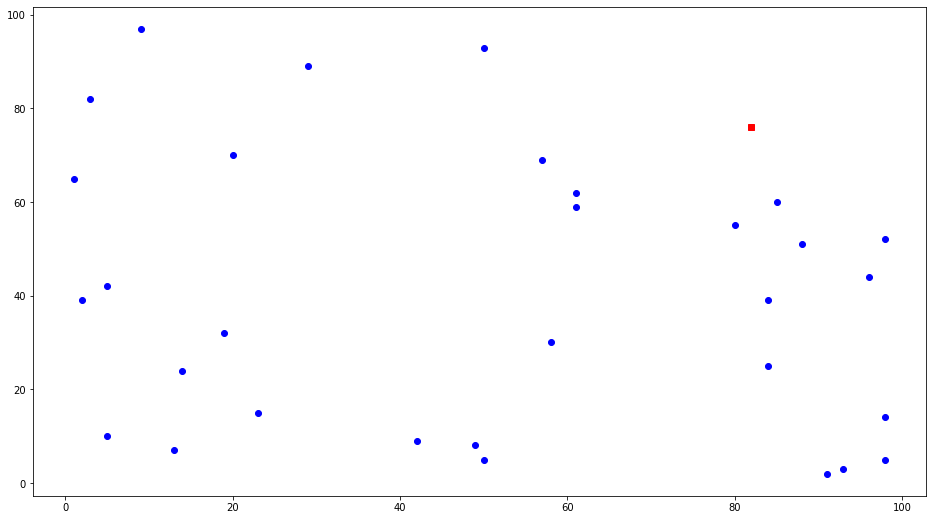

In [6]:
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

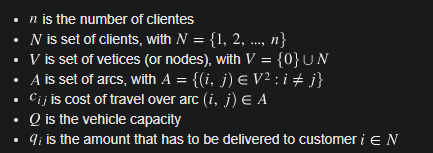
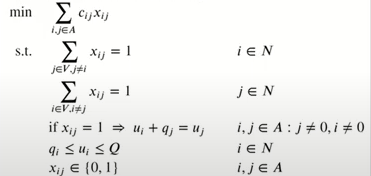

In [7]:
N = [i for i in range(1, n+1)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j ]
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A}
# Q = 20
# q = {i: rnd.randint(1, 10) for i in N}

In [8]:
from gurobipy import Model, GRB, quicksum

In [9]:
mdl = Model('CVRP')

Academic license - for non-commercial use only - expires 2021-03-18
Using license file C:\Users\BigBadBraddy\gurobi.lic


In [10]:
# x = mdl.addVars(p, A, vtype=GRB.BINARY)
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [11]:
# for i, j in A r in range(1, p):
#     print(x[r, i, j], r, i, j)

# for r in range(1, p):
#     for i, j in A:
#         print(x)
#         print(x[r, i, j], r, i, j)

In [12]:
mdl.modelSense = GRB.MINIMIZE
# mdl.setObjective(quicksum(x[r, i, j]*c[i, j] for i, j in A for r in p))
mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))

In [13]:
# mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
# # mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
# mdl.addConstrs((quicksum(x[i, h] for i in V if i != h) - quicksum(x[h, j] for j in N if j != h)) == 0 for h in N)
# mdl.addConstr(quicksum(x[0, j] for j in N) <= p)
# mdl.addConstrs(quicksum(u[i] + q[j]*x[i, j] - Q*(1-x[i, j])) <= u[j] for i in V for j in V)
# # mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
# mdl.addConstrs(u[i] >= q[i] for i in N)
# mdl.addConstrs(u[i] <= Q for i in N)

# mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
# mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
#                for i, j in A if i != 0 and j != 0)
mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
               for i, j in A if i != 0 and j != 0)
mdl.addConstr(quicksum(x[0, j] for j in N) <= p)
mdl.addConstrs(u[i] >= q[i] for i in N)
mdl.addConstrs(u[i] <= Q for i in N)

KeyError: 1

In [ ]:
# mdl.addConstrs(quicksum(x[r, i, j] for r in p for i in V if i != j) == 1 for j in N)
# mdl.addConstrs(quicksum(x[r, 0, j] for j in N) == 1 for r in p)
# # mdl.addConstrs(quicksum(x[r, i, j] for i in V if i != j) == quicksum(x[r, j, i] for i in V) for j in V for r in p)
# mdl.addConstrs(quicksum(q[j]*x[r, i, j] for i in V for j in N if i != j) <= Q for r in p)
# # mdl.addConstrs(quicksum(x[r, i, j] for r in p for i in V for j in N if i != j) <= Q for r in p) 
# mdl.addConstrs(quicksum(x[r, i, j] for r in p for i in V for j in N if i != j) <= Q for r in p) 

In [ ]:
# mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
# mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
# mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
#                for i, j in A if i != 0 and j != 0)
# mdl.addConstrs(u[i] >= q[i] for i in N)
# mdl.addConstrs(u[i] <= Q for i in N)

In [ ]:
mdl.Params.MIPGap = 0.1
mdl.Params.TimeLimit = 10  # seconds
mdl.optimize()

In [ ]:
# for a in A:
#     print(a)
#     print(x)

# for lol in x:
#     print(lol[0:2])
# print(x)
active_arcs = [a for a in A if x[a].x > 0.99]
for a in A:
    print(x[a])
    
# for temp in x:
#     print(temp)

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')